In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pyts.datasets import load_basic_motions

# Load the data
X_train, X_test, y_train, y_test = load_basic_motions(return_X_y=True)


In [3]:
type(X_train)

numpy.ndarray

In [4]:
X_train.shape

(40, 6, 100)

In [5]:
y_train.shape

(40,)

In [6]:
y_train[0]

'Standing'

In [7]:
y_test.shape

(40,)

In [8]:
# Encode the categorical target labels into numerical form
from sklearn.preprocessing import LabelEncoder

In [9]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Show the first few rows of the dataset after encoding
y_train, y_test

(array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64),
 array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [10]:
X_train.max()

34.86621

In [11]:
X_train.min()

-27.822042

In [12]:

# Flatten the last two dimensions of the data
X_train_2d = X_train.reshape(X_train.shape[0], -1)

print(X_train_2d.shape)  # This should print: (10, 100)


(40, 600)


In [13]:

# Flatten the last two dimensions of the data
X_test_2d = X_test.reshape(X_test.shape[0], -1)

print(X_test_2d.shape)  # This should print: (10, 100)

(40, 600)


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


# Normalize the features to range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))

X_train_scaled = scaler.fit_transform(X_train_2d)
X_test_scaled = scaler.transform(X_test_2d)


X_train_scaled.shape, X_test_scaled.shape


((40, 600), (40, 600))

In [15]:
X_train_scaled.max(), X_test_scaled.max()

(1.0000000000000002, 3.022700085888661)

In [16]:
# Reshape the data to (n_samples, 100, 6)
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 100, 6))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 100, 6))

X_train_reshaped.shape, X_test_reshaped.shape

((40, 100, 6), (40, 100, 6))

In [17]:
no_classes = len(np.unique(y_train))

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the basic RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_rnn.add(Dropout(0.2))
model_rnn.add(Dense(no_classes, activation='softmax'))

# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Show a summary of the model
model_rnn.summary()

# Train the model
history_rnn = model_rnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# Repeat the process for LSTM and GRU
# LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_lstm.add(Dropout(0.2))
model_lstm.add(Dense(no_classes, activation='softmax'))
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_lstm.summary()
history_lstm = model_lstm.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

# GRU
model_gru = Sequential()
model_gru.add(GRU(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_gru.add(Dropout(0.2))
model_gru.add(Dense(no_classes, activation='softmax'))
model_gru.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model_gru.summary()
history_gru = model_gru.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2850      
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 4)                 204       
                                                                 
Total params: 3054 (11.93 KB)
Trainable params: 3054 (11.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 2s 374ms/step - loss: 1.6158 - accuracy: 0.2750 - val_loss: 1.5026 - val_accuracy: 0.2750
Epoch 2/10
2/2 [==============================] - 0s 49ms/step - loss: 1.5414 - accuracy: 0.2000 - val_loss: 1.4553 - val_accuracy: 0.2250
Epoch 3

In [19]:
def make_plots(history, model_name):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy for {}'.format(model_name))
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss for {}'.format(model_name))
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    
    plt.show()


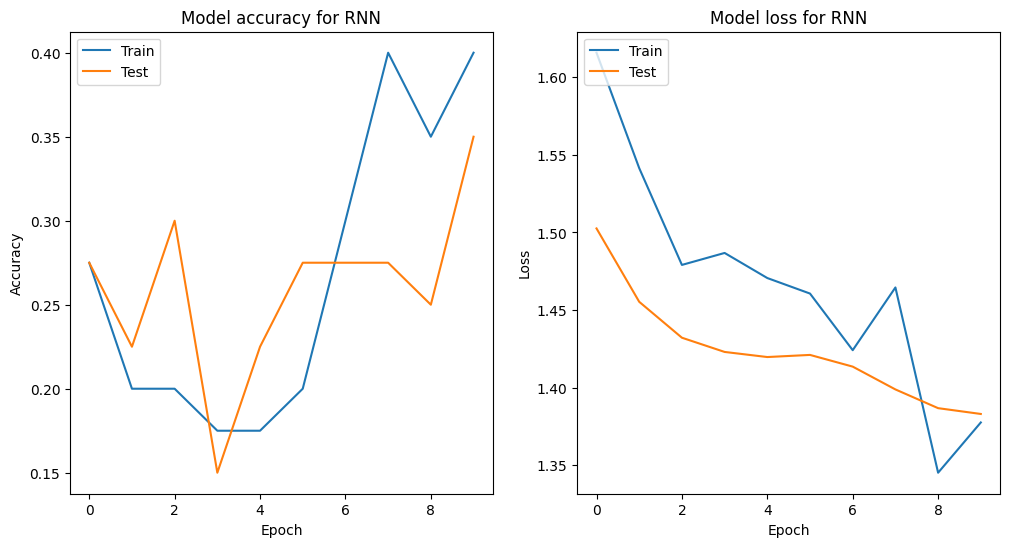

In [20]:
 make_plots(history_rnn, 'RNN')

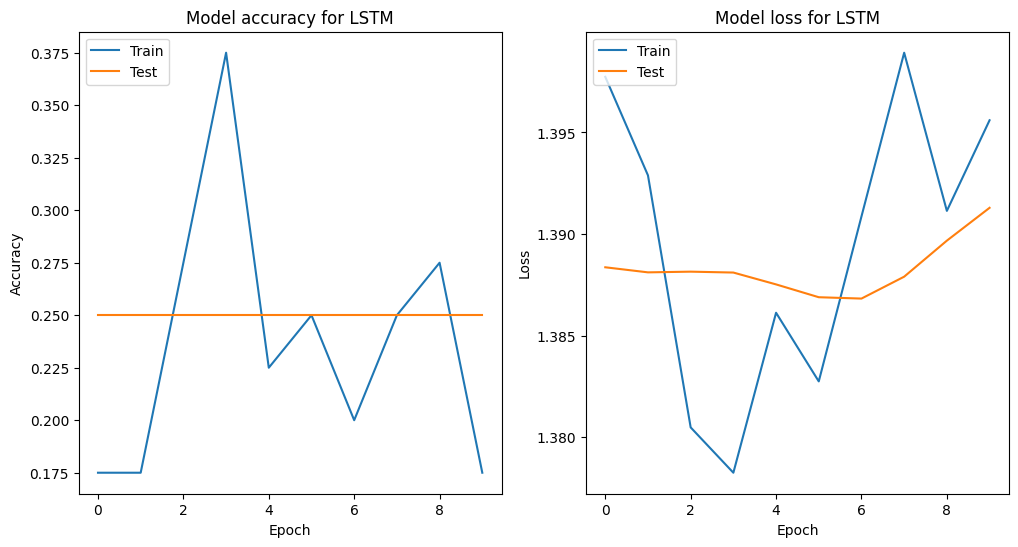

In [21]:
 make_plots(history_lstm, 'LSTM')

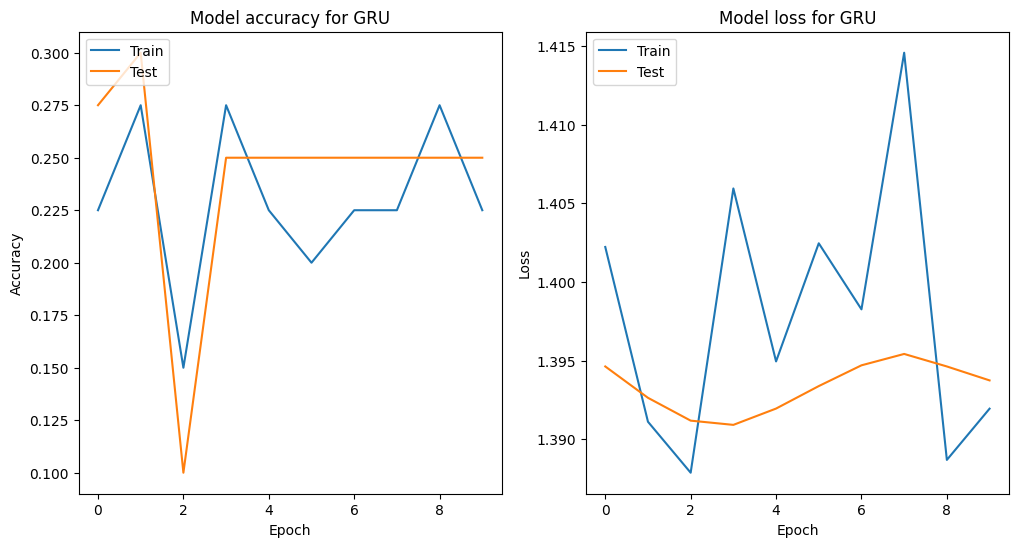

In [22]:
 make_plots(history_gru, 'GRU')

In [27]:
!pip install --upgrade tensorflow

In [42]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier

# Function to create model, required for KerasClassifier
def create_model(units=50, dropout=0.2):
    model = Sequential()
    model.add(SimpleRNN(units, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(no_classes, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
    return model

# Create a KerasClassifier
model = KerasClassifier(model=create_model, epochs=10, batch_size=32, verbose=1)

# Define the grid search parameters
param_grid = {
    'optimizer__learning_rate': [0.05, 0.1],
    'model__units': [30, 50, 70, 100, 200],
    'model__dropout': [0, 0.2, 0.5],
}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train_reshaped, y_train)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")


Epoch 1/10
2/2 [==============================] - 1s 23ms/step - loss: 1.5283 - accuracy: 0.2000
Epoch 2/10
2/2 [==============================] - 0s 20ms/step - loss: 1.4593 - accuracy: 0.2750
Epoch 3/10
2/2 [==============================] - 0s 21ms/step - loss: 1.3221 - accuracy: 0.2750
Epoch 4/10
2/2 [==============================] - 0s 19ms/step - loss: 1.2633 - accuracy: 0.3750
Epoch 5/10
2/2 [==============================] - 0s 21ms/step - loss: 1.1597 - accuracy: 0.4500
Epoch 6/10
2/2 [==============================] - 0s 20ms/step - loss: 1.0422 - accuracy: 0.6500
Epoch 7/10
2/2 [==============================] - 0s 23ms/step - loss: 0.9302 - accuracy: 0.6750
Epoch 8/10
2/2 [==============================] - 0s 20ms/step - loss: 0.8864 - accuracy: 0.8000
Epoch 9/10
2/2 [==============================] - 0s 19ms/step - loss: 0.8356 - accuracy: 0.8250
Epoch 10/10
2/2 [==============================] - 0s 21ms/step - loss: 0.7867 - accuracy: 0.8500
Best: 0.55 using {'model__dro

In [49]:
# Define the basic RNN model
model_rnn = Sequential()
model_rnn.add(SimpleRNN(200, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model_rnn.add(Dropout(0.0))
model_rnn.add(Dense(no_classes, activation='softmax'))

# Compile the model
model_rnn.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.1), metrics=['accuracy'])

# Show a summary of the model
model_rnn.summary()

# Train the model
history_rnn = model_rnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_data=(X_test_reshaped, y_test))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_5 (SimpleRNN)    (None, 200)               41400     
                                                                 
 dropout_7 (Dropout)         (None, 200)               0         
                                                                 
 dense_7 (Dense)             (None, 4)                 804       
                                                                 
Total params: 42204 (164.86 KB)
Trainable params: 42204 (164.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
2/2 [==============================] - 1s 388ms/step - loss: 1.4521 - accuracy: 0.2750 - val_loss: 14.8664 - val_accuracy: 0.2250
Epoch 2/10
2/2 [==============================] - 0s 84ms/step - loss: 17.7816 - accuracy: 0.2000 - val_loss: 12.4798 - val_accuracy: 0.250